In [1]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
audio_data = 'sample-12s.mp3'
y, sr = librosa.load(audio_data)

Функция load считывает аудио-файл в виде временного рядя. Где, sr обозначает sample_rate.

Time series (временной ряд) представлен массивом.
sample_rate — это количество сэмплов на секунду аудио.
По умолчанию звук микшируется в моно. Но его можно передискретизировать во время загрузки до 22050 Гц. Это делается с помощью дополнительных параметров в функции librosa.load

In [3]:
print(type(y), type(sr))
print(y.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(281856,) 22050


С помощью IPython.display можно проигрывать аудио в Jupyter Notebook, а с помощью display.waveshow формируются звуковые волны и мы можем посмотреть, как выглядит звук:

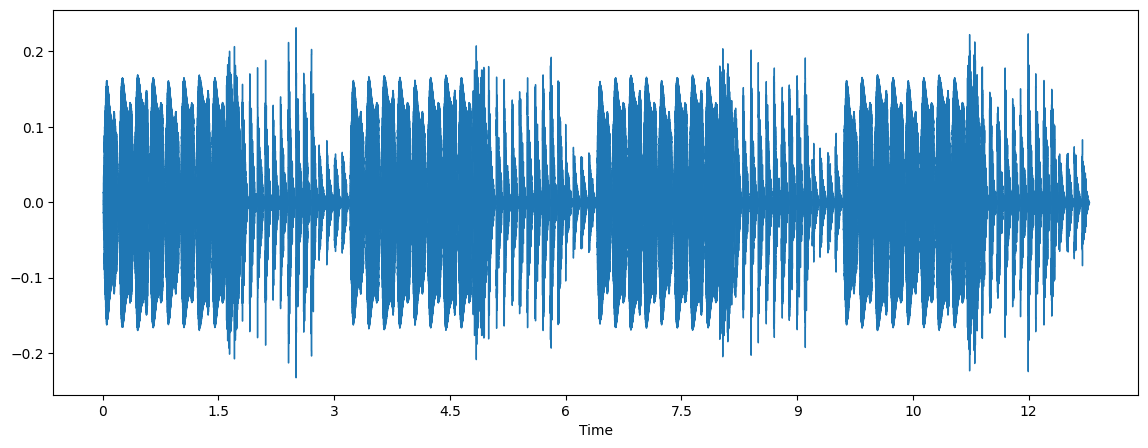

In [4]:
import IPython.display as ipd
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_data)

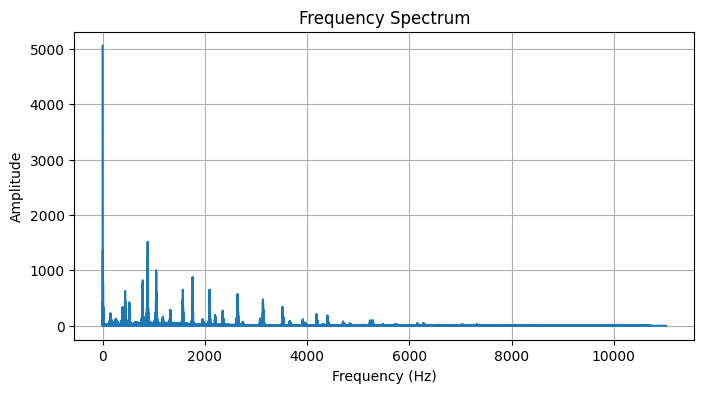

In [5]:
# Compute the FFT of the waveform
from scipy.fft import fft
spectrum = fft(y)

# Frequency bins
frequencies = np.fft.fftfreq(len(spectrum), 1 / sr)

# Plot the frequency spectrum
plt.figure(figsize=(8, 4))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()

Спектрограмма

Спектрограмма - это визуальный способ представления уровня или “громкости” сигнала во времени на различных частотах,
присутствующих в форме волны. Обычно изображается в виде тепловой карты. .stft() преобразует данные в кратковременное преобразование
Фурье. С помощью STFT можно определить амплитуду различных частот, воспроизводимых в данный момент времени аудиосигнала.

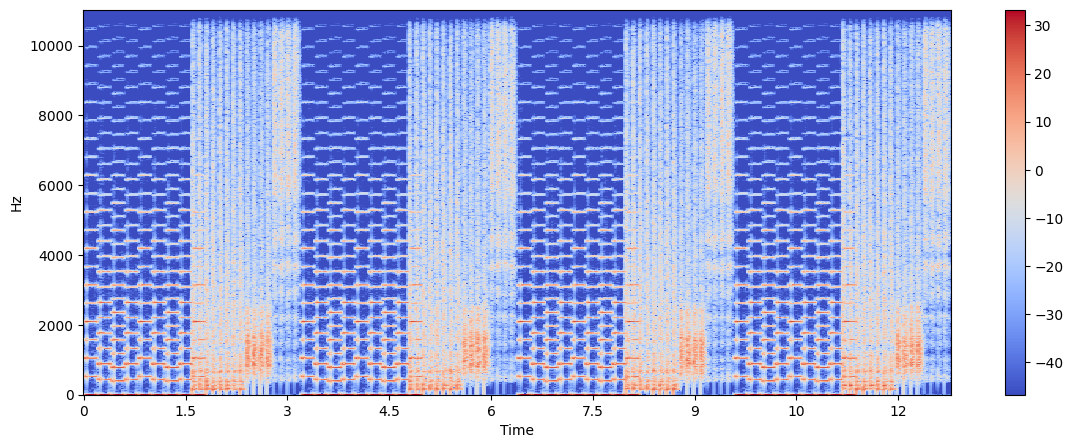

In [6]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

Извлечение признаков из аудиофайла
У сэмпла есть несколько важных признаков. Есть фундаментальное понятие ритма в некоторых формах, а остальные либо имеют свою нюансы, либо связаны:

Темп: скорость, с которой паттерны повторяются. Темп измеряется в битах в минуту (BPM). Если у музыки 120 BPM, это значит, что каждую минуту в ней 120 битов (ударов).
Бит: отрезок времени. Это ритм, выстукиваемый в песне. Так, в одном такте 4 бита, например.
Такт: логичное деление битов. Обычно в такте 3 или 4 бита, хотя возможны и другие варианты.
Интервал: в программах для редактирования чаще всего встречаются интервалы. Обычно есть последовательность нот, например, 8 шестнадцатых одинаковой длины. Обычно интервал — 8 нот, триплеты или четверные.
Ритм: список музыкальных звуков. Все ноты и являются ритмом.

Detected Tempo: [151.99908088] beats/min
beats: 27


<ipython-input-7-7587fbba8468>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g=sns.barplot(data={'x':beat_nums,'y':beat_time_diff},x='x',y='y',  palette="BuGn_d",ax=ax)


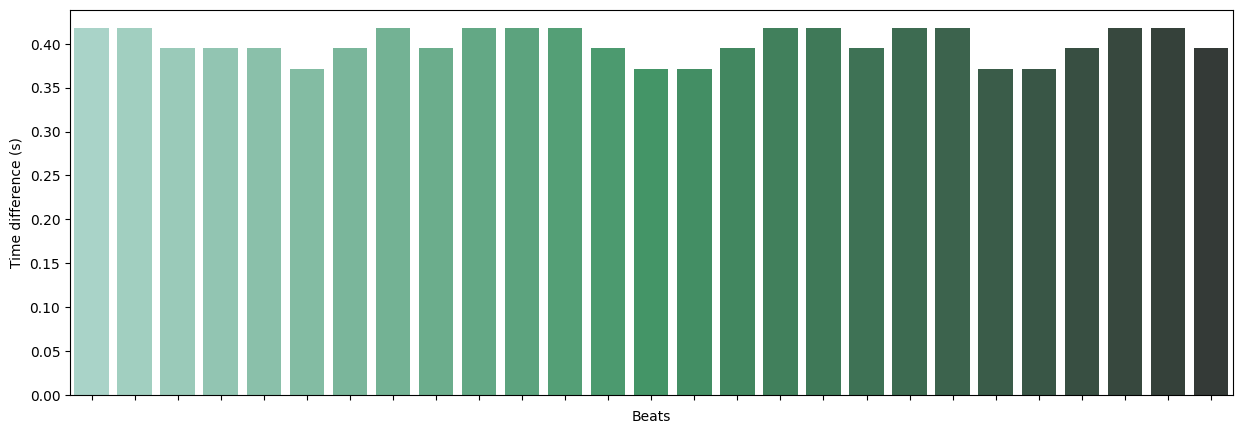

In [7]:
# Beat Extraction
y_harmonic, y_percussive = librosa.effects.hpss(y)
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

print('beats:', len(beat_nums))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(data={'x':beat_nums,'y':beat_time_diff},x='x',y='y',  palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[])

ошибка состояла в том, что вместо кол-ва бит вводился массив, содержащий в себе числа от 1 до кол-ва бит

Мел-кепстральные коэффициенты (MFCC)

Text(0.5, 1.0, 'MFCC')

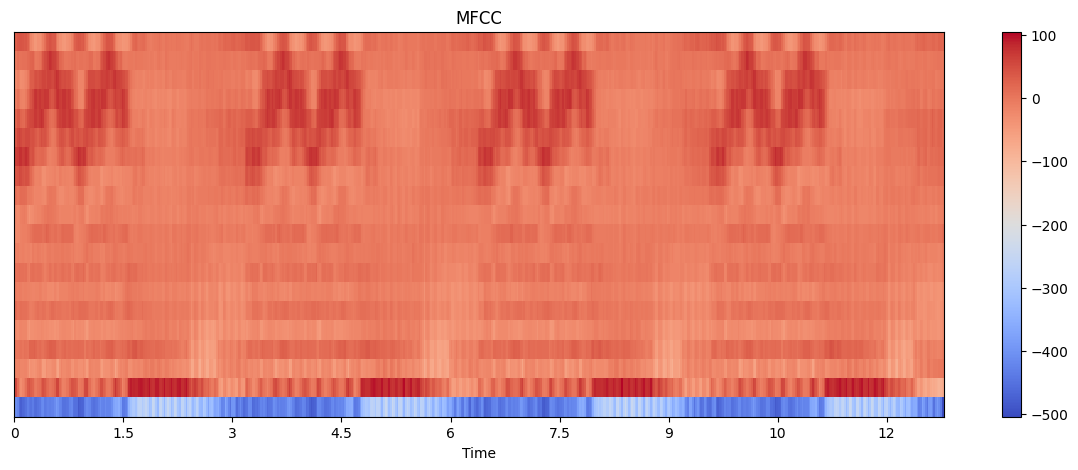

In [8]:
# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [9]:
mfccs

array([[-4.33230377e+02, -4.07723541e+02, -4.22310272e+02, ...,
        -4.06696533e+02, -4.34139130e+02, -5.04158783e+02],
       [ 1.05120285e+02,  5.10096436e+01,  1.25828228e+01, ...,
        -8.82572937e+01, -8.37838364e+01, -7.52680359e+01],
       [-2.41377125e+01, -1.51941872e+01, -1.57083282e+01, ...,
        -1.33968866e+00, -7.96870440e-02,  2.52371144e+00],
       ...,
       [-2.65826740e+01, -2.50971222e+01, -1.29866076e+01, ...,
        -3.38852215e+00, -3.39991152e-02, -1.50940847e+00],
       [-7.24760342e+00, -2.14732361e+00,  7.74578953e+00, ...,
         4.25135756e+00,  2.54025173e+00, -3.57361913e-01],
       [ 2.47296257e+01,  3.13387451e+01,  3.88622284e+01, ...,
         2.21615181e+01,  2.34146500e+01,  1.95270500e+01]], dtype=float32)

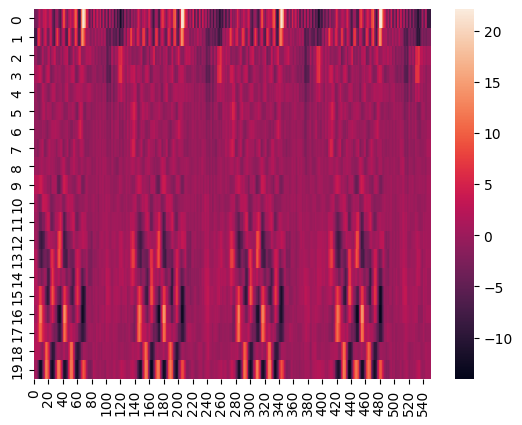

In [10]:
mfcc_delta = librosa.feature.delta(mfccs)
sns.heatmap(mfcc_delta)
plt.show()

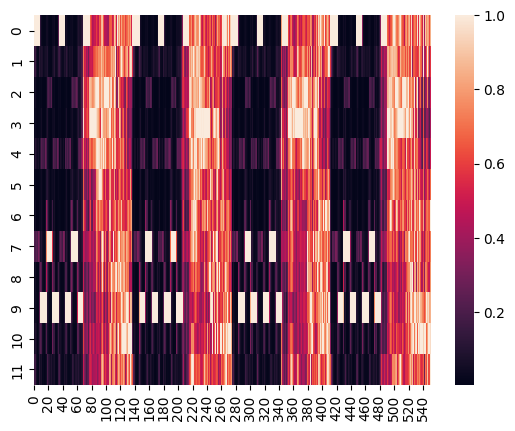

In [11]:
# нормализация в хромограмму
chromagram = librosa.feature.chroma_cqt(y=y, sr=sr)
sns.heatmap(chromagram)
plt.show()

Спектральный центроид - Spectral Centroid.

Указывает, на какой частоте сосредоточена энергия спектра или, другими словами, указывает, где расположен “центр масс” для звука.
librosa.feature.spectral_centroid вычисляет спектральный центроид для каждого фрейма в сигнале:

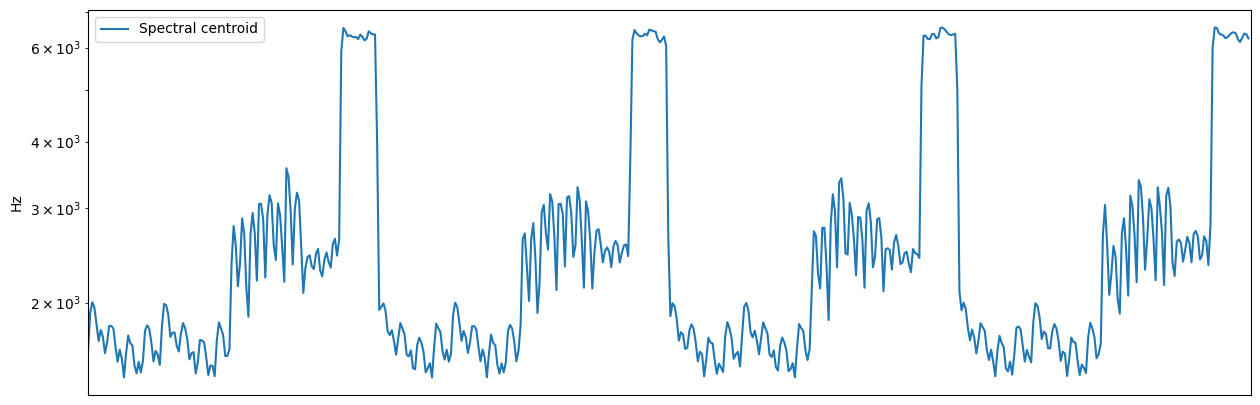

In [12]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

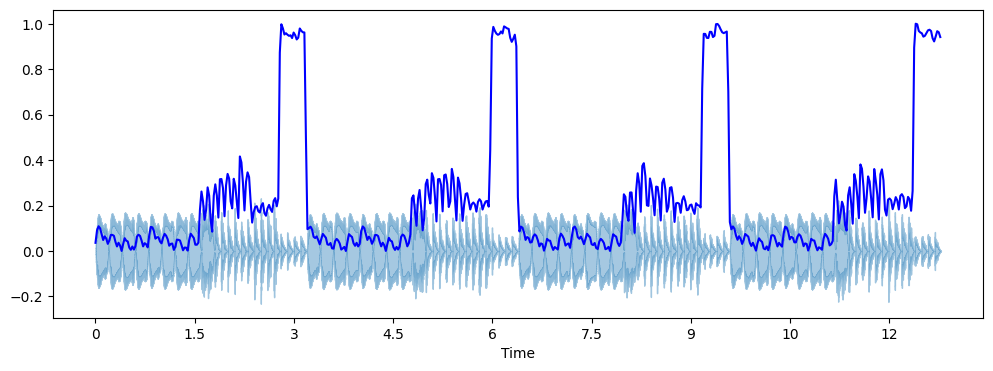

In [13]:
import sklearn
spectral_centroids = cent[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Гармоническая и перкуссионная части сигнала — это два основных компонента звукового сигнала, которые вместе формируют уникальный звуковой пейзаж.

Гармоническая часть сигнала представляет собой периодическую составляющую звука, которая определяется основной частотой и ее гармониками. Гармоники — это целые кратные основной частоты, которые образуют гармонический ряд. Гармоническая часть сигнала отвечает за тембр звука, то есть его цвет и окраску. Например, звук скрипки и звук трубы имеют разные гармонические составляющие, что и определяет их уникальный тембр.

Перкуссионная часть сигнала представляет собой непериодическую составляющую звука, которая возникает в результате ударных или импульсных воздействий на инструмент или объект. Перкуссионная часть сигнала отвечает за атаку и затухание звука, а также за его динамику. Например, звук барабана или фортепиано имеет ярко выраженную перкуссионную составляющую, которая определяет его динамичность и атаку.

Text(0.5, 1.0, 'Harmonic + Percussive')

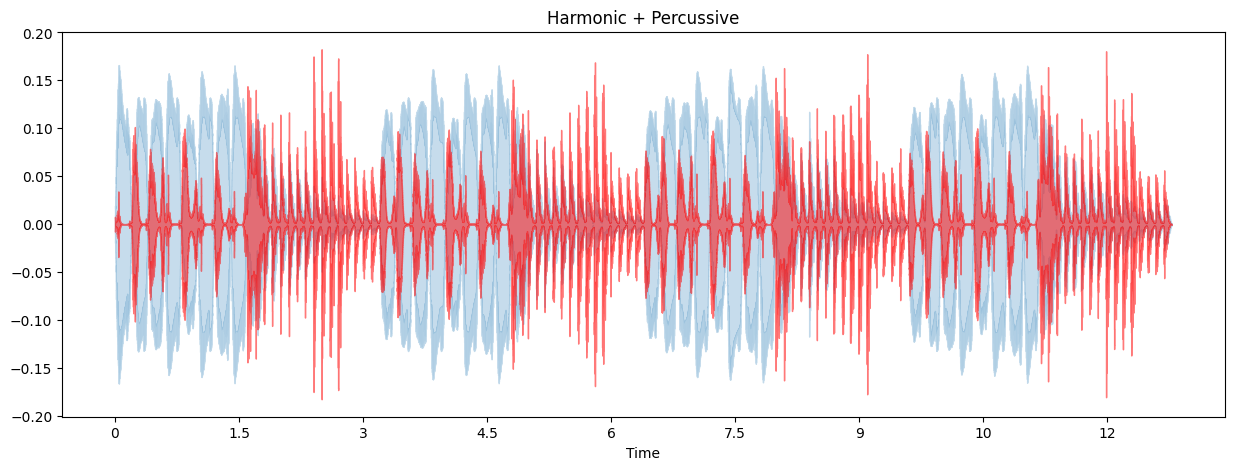

In [14]:
# Seperation of Harmonic and Percussive Signals
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')